**Stock recommender system based on the Financial Health Index** 

Name = Aarya Maheshkumar Jadhav

Student Id = 20685514

Course Type = Taught Masters

### Integrity statement

I, Aarya Jadhav, have read and understood the School's Academic Integrity Policy, as well as guidance relating to this module, and confirm that this submission complies with the policy. The content of this file is my own original work, with any significant material copied or adapted from other sources clearly indicated and attributed.

### Aim of project:

Oftentimes investors and especially beginners looking to invest in the right place fail to make informed decisions. For example there's an user X looking for a stable side income, so he thinks of making investments in the stock market. For this purpose, he would obviously look through the internet for the "top stocks to buy today" and he is recommended Tesla for example, so he buys the Tesla stock. Now in a few days he starts noticing that Tesla is going through major fluctuations- because with a rapid growth, comes higher fluctuations. So this in turn would put him in distress, then he realises that Tesla doesn't provide any dividend yield either, so being a complete newbie into the market, it might send him into a dilemma. This is because he bought the stock that is good for someone looking for a growth in their income. Therefore, it is especially important for the investors and beginners to look closely at the market and identify what they expect from it, rather than believing the hearsay and a few clicks of the internet. This, however, could be tedious since there are too many factors to analyse, that affect and change the market daily .

Traditional investment strategies can overlook critical financial metrics or fail to provide appropriate insights about whether a stock is meant for your stability, growth or value. It might also skip over the fact whether the stock is undervalued, overvalued, or fairly valued. The aim of this project is to analyse key financial metrics of stocks in a specific sector (in this case, the automotive sector), calculate a Financial Health Index (FHI) to evaluate stability, growth or value and assess valuation. Based on the FHI and valuation, the system will recommend the user whether to avoid, buy or keep an eye on a certain stock. This enables investors to identify promising stocks, avoid financial risks, and optimize their portfolios with user oriented recommendations.

This project is all about helping investors make smarter decisions. The stock market can be pretty unpredictable, and it's not always easy to figure out which stocks are worth investing in or avoiding. By looking at important financial metrics and calculating a Financial Health Index, we can get a clear picture of a stock's stability and value. This way, investors can spot undervalued or overvalued stocks, make informed choices, and build a stronger portfolio, even in uncertain market conditions

## Code overview:

First I have fetched the stock tickers and their metrics from yfinance. The data is stored in a dataframe called financial_df. All the null values of the data are dealt with manually, creating a complete dataframe ready to be explored. Then the fetched metrics are weighted based upon their importance towards "stability", "growth" and "value". Financial health index is then calculated based upon these metrics and their weights. 

Further analysis was done to understand whether the stock is under or over performing, and whether it's under/ over/ fairly valued. Based upon the performance, valuation, beta (volatality of stock), revenue and FHI score of individual stocks, they are recommended to avoid, buy or keep an eye on. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import yfinance as yf

All of the stocks data, i.e the tickers and their metrics, are fetched from the yfinance module. 
I have decided to first import all the tickers and store them in a list. 
Then a fetch_metrics function is defined which takes the said ticker as an input and fetch metrics for them using the ".info" attribute of yfinance to fetch the metrics. I have chose to add "info.get" in order to return "None" instead of causing an error in case there are any missing values in the data.

These metrics are stored as a dictionary. Ths function is applied to the list of tickers which is looped through using to fetch the appropriate metrics for each ticker.


In [2]:
stocks = ['F', 'TM', 'RACE', 'GM','TSLA','NSANY','RIVN','HMC', 'STLA', 'DOMVF', 'BLBD']

def fetch_metrics(ticker):
    stock = yf.Ticker(ticker)
    info = stock.info

    metrics = {
        'ticker': ticker,
        'currentRatio': info.get('currentRatio', None),#Shows if a company can pay short-term debts (higher = safer)
        'debtToEquity': info.get('debtToEquity', None), #How much debt the company has compared to its equity (lower = safer).
        'returnOnEquity': info.get('returnOnEquity', None), #How efficiently the company uses investors’ money to generate profit (higher = better).
        'priceToBook': info.get('priceToBook', None), #Compares the company’s market price to its actual book value (lower = undervalued).
        'earningsGrowth': info.get('earningsGrowth', None), #How much the company's earnings are growing (higher = better).
        'dividendYield': info.get('dividendYield', None), #How much a company pays in dividends relative to its stock price (higher = better for income investors)
        'beta': info.get('beta', None), #Measures how volatile the stock is compared to the market (beta > 1 = riskier, < 1 = safer).
        'revenue': info.get('totalRevenue', None)
    }

    return metrics

financial_data = [fetch_metrics(stock) for stock in stocks]
financial_df = pd.DataFrame(financial_data)
financial_df

,ticker,currentRatio,debtToEquity,returnOnEquity,priceToBook,earningsGrowth,dividendYield,beta,revenue
0,F,1.147,359.359,0.07990,0.947085,-0.265,0.0566,1.636,182743007232
1,TM,1.229,103.530,0.12594,0.067229,-0.546,0.0294,0.404,46396157722624
2,RACE,1.538,92.559,0.46376,24.114832,0.143,0.0058,0.992,6464526848
3,GM,1.209,174.581,0.14167,0.817852,0.218,0.0091,1.414,182719004672
4,TSLA,1.844,18.078,0.20389,18.388975,0.170,NaN,2.295,97150001152
5,NSANY,1.793,120.844,0.02716,0.003079,NaN,0.0518,0.933,12606590943232
6,RIVN,5.089,102.458,-0.67157,2.433368,NaN,NaN,2.045,4551000064
7,HMC,1.431,82.738,0.08327,0.009840,-0.592,0.0544,0.490,21617023385600
8,STLA,1.144,39.188,0.16757,0.499964,-0.455,0.1211,1.238,176192995328
9,DOMVF,1.590,22.883,0.09053,0.027152,-0.956,0.2436,0.928,119569465344


Once we have all the data in our dataframe financial_df, I checked for null values. 
Then I looked for the exact location of the null values.

I chose to impute these null values manually instead of imputing them with mean, median or mode or KNN even to maintain the integrity of data and and get a higher accuracy. 

NaN values in dividend yield represent that the company doesn't give out any dividend to the stock holders, which is why they were replaced with 00. 
NaN values in earnings growth were replaced using the formula for earnings growth which is:
(earning per share (current year)- earning per share(previous year))/ earnings per share (previous year)

The EPS values were fetched manually from the internet for simplicity in this case. However, if there are too many missing values, imputation methods, as mentioned above, can be used; or the EPS values can be fetched directly from the internet using beautiful soup.

In [3]:
financial_df.isnull().sum()

ticker            0
currentRatio      0
debtToEquity      0
returnOnEquity    0
priceToBook       0
earningsGrowth    2
dividendYield     3
beta              0
revenue           0
dtype: int64

In [4]:
print(financial_df.loc[financial_df['dividendYield'].isnull(), ['ticker', 'dividendYield']])
print(financial_df.loc[financial_df['earningsGrowth'].isnull(), ['ticker', 'earningsGrowth']])

   ticker  dividendYield
4    TSLA            NaN
6    RIVN            NaN
10   BLBD            NaN
  ticker  earningsGrowth
5  NSANY             NaN
6   RIVN             NaN


In [5]:
financial_df['dividendYield'].fillna(00, inplace= True)
financial_df

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_4372\3844066045.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  financial_df['dividendYield'].fillna(00, inplace= True)


,ticker,currentRatio,debtToEquity,returnOnEquity,priceToBook,earningsGrowth,dividendYield,beta,revenue
0,F,1.147,359.359,0.07990,0.947085,-0.265,0.0566,1.636,182743007232
1,TM,1.229,103.530,0.12594,0.067229,-0.546,0.0294,0.404,46396157722624
2,RACE,1.538,92.559,0.46376,24.114832,0.143,0.0058,0.992,6464526848
3,GM,1.209,174.581,0.14167,0.817852,0.218,0.0091,1.414,182719004672
4,TSLA,1.844,18.078,0.20389,18.388975,0.170,0.0000,2.295,97150001152
5,NSANY,1.793,120.844,0.02716,0.003079,NaN,0.0518,0.933,12606590943232
6,RIVN,5.089,102.458,-0.67157,2.433368,NaN,0.0000,2.045,4551000064
7,HMC,1.431,82.738,0.08327,0.009840,-0.592,0.0544,0.490,21617023385600
8,STLA,1.144,39.188,0.16757,0.499964,-0.455,0.1211,1.238,176192995328
9,DOMVF,1.590,22.883,0.09053,0.027152,-0.956,0.2436,0.928,119569465344


In [6]:
def calculate_earnings_growth(eps_23, eps_24, ticker, financial_df):
  earnings_growth= (eps_24 - eps_23)/eps_23
  print(f"Earnings growth for {ticker}: {earnings_growth:.2f}")
  financial_df.loc[financial_df['ticker']==ticker, 'earningsGrowth']= earnings_growth

  return earnings_growth

nsany_23= 0.84
nsany_24= 1.53

rivn_23= -5.74
rivn_24= -1.44

calculate_earnings_growth(nsany_23, nsany_24, 'NSANY', financial_df)
calculate_earnings_growth(rivn_23, rivn_24, 'RIVN', financial_df)
financial_df

Earnings growth for NSANY: 0.82
Earnings growth for RIVN: -0.75


,ticker,currentRatio,debtToEquity,returnOnEquity,priceToBook,earningsGrowth,dividendYield,beta,revenue
0,F,1.147,359.359,0.07990,0.947085,-0.265000,0.0566,1.636,182743007232
1,TM,1.229,103.530,0.12594,0.067229,-0.546000,0.0294,0.404,46396157722624
2,RACE,1.538,92.559,0.46376,24.114832,0.143000,0.0058,0.992,6464526848
3,GM,1.209,174.581,0.14167,0.817852,0.218000,0.0091,1.414,182719004672
4,TSLA,1.844,18.078,0.20389,18.388975,0.170000,0.0000,2.295,97150001152
5,NSANY,1.793,120.844,0.02716,0.003079,0.821429,0.0518,0.933,12606590943232
6,RIVN,5.089,102.458,-0.67157,2.433368,-0.749129,0.0000,2.045,4551000064
7,HMC,1.431,82.738,0.08327,0.009840,-0.592000,0.0544,0.490,21617023385600
8,STLA,1.144,39.188,0.16757,0.499964,-0.455000,0.1211,1.238,176192995328
9,DOMVF,1.590,22.883,0.09053,0.027152,-0.956000,0.2436,0.928,119569465344


In [7]:
financial_df.describe()

,currentRatio,debtToEquity,returnOnEquity,priceToBook,earningsGrowth,dividendYield,beta,revenue
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,1.100000e+01
mean,1.764455,107.916818,0.187203,5.157487,-0.025427,0.051982,1.272182,7.399133e+12
std,1.129186,94.948079,0.471500,8.506575,0.830315,0.073559,0.599574,1.475374e+13
min,1.144000,18.078000,-0.671570,0.003079,-0.956000,0.000000,0.404000,1.299905e+09
25%,1.219000,55.027500,0.081585,0.047190,-0.569000,0.002900,0.930500,5.180726e+10
50%,1.431000,92.559000,0.125940,0.817852,-0.265000,0.029400,1.238000,1.761930e+11
75%,1.691500,112.187000,0.185730,5.928177,0.194000,0.055500,1.627500,6.394667e+12
max,5.089000,359.359000,1.347110,24.114832,1.931000,0.243600,2.295000,4.639616e+13


To calculate the Financial health index, the data is first standardised to bring all the metrics on the same scale for a fair comparison

In [8]:
#standardise the data
std_columns= financial_df.columns[1:]
financial_df[std_columns]= financial_df[std_columns].apply(lambda x: (x - x.mean())/x.std())
financial_df

,ticker,currentRatio,debtToEquity,returnOnEquity,priceToBook,earningsGrowth,dividendYield,beta,revenue
0,F,-0.546814,2.648207,-0.227577,-0.494959,-0.288532,0.062782,0.606795,-0.489123
1,TM,-0.474195,-0.046202,-0.129931,-0.598391,-0.626958,-0.306987,-1.447998,2.643196
2,RACE,-0.200547,-0.161750,0.586547,2.228552,0.202848,-0.627816,-0.467302,-0.501071
3,GM,-0.491907,0.702112,-0.096570,-0.510151,0.293175,-0.582955,0.236532,-0.489124
4,TSLA,0.070445,-0.946189,0.035392,1.555442,0.235365,-0.706664,1.705909,-0.494924
5,NSANY,0.025280,0.136150,-0.339433,-0.605932,1.019921,-0.002472,-0.565705,0.352959
6,RIVN,2.944197,-0.057493,-1.821362,-0.320237,-0.871599,-0.706664,1.288946,-0.501201
7,HMC,-0.295305,-0.265185,-0.220430,-0.605137,-0.682359,0.032874,-1.304563,0.963681
8,STLA,-0.549471,-0.723857,-0.041639,-0.547520,-0.517361,0.939623,-0.057010,-0.489567
9,DOMVF,-0.154496,-0.895582,-0.205032,-0.603102,-1.120747,2.604943,-0.574044,-0.493405


In [9]:
financial_df.to_csv("financial_data.csv", index=False)
financial_df= pd.read_csv("C:\\Users\\ADMIN\\github-classroom\\mpags-python\\project-2024-28Aarya\\financial_data.csv")

Given below is the dictionary of weights which stores all the weights given to a case that user will select. The metrics are weighted based upon their importance to achieve a certain goal like stability, growth or value.

In [10]:
weights = {
    'stability': {
        'currentRatio': 0.2,
        'debtToEquity': 0.2,
        'beta': 0.2,
        'dividendYield': 0.1,
        'returnOnEquity': 0.075,
        'priceToBook': 0.05,
        'revenue': 0.05,
        'earningsGrowth': 0.1
    },

    'growth': {
        'earningsGrowth': 0.25,
        'revenue': 0.25,
        'returnOnEquity': 0.2,
        'debtToEquity': 0.1,
        'priceToBook': 0.075,
        'beta': 0.05,
        'dividendYield': 0.05,
        'currentRatio': 0.05
    },

    'Value': {
        'priceToBook': 0.25,
        'dividendYield': 0.05,
        'debtToEquity': 0.2,
        'returnOnEquity': 0.075,
        'revenue': 0.05,
        'earningsGrowth': 0.1,
        'currentRatio': 0.05,
        'beta': 0.25
    }
}


Financial health index is calculated based on the weighted average, again the metrics dictionary and weights dictionary is looped through to get the values and perform calculation.

In [11]:
def calculate_fhi(metrics, weights):
    fhi_score = 0

    for metric, weight in weights.items():
        if metric in metrics and metrics[metric] is not None:
            fhi_score += metrics[metric] * weight

    return fhi_score


Before the financial health index can be calculated, however, a function to get_user_choice is defined which asks the user to define their goal and choose one out of "stability", "growth" and "value". 
Based on the user_choice, the weights in weights dictionary are fetched, and along with that the Financial health index is finally calculated by calling the calculate_fhi function defined earlier, with metrics and chosen weights as input.This function is iteratively applied to our dataframe using another function called calculate_fhi_for_stocks. And this final function is applied to our main dataframe.

In [12]:
def get_user_choice():
    print("What are you looking for in the stock market?")
    print("1. Stability")
    print("2. Growth")
    print("3. Value")


    choice = input("Enter your choice (1/2/3): ")


    if choice == '1':
        return 'stability'
    elif choice == '2':
        return 'growth'
    elif choice == '3':
        return 'Value'
    else:
        print("Invalid input. Please enter a valid number (1/2/3).")
        return get_user_choice()
    
global user_choice
user_choice = get_user_choice()

chosen_weights = weights[user_choice]

def calculate_fhi_for_stocks(df, chosen_weights):              
    df['FHI'] = df.apply(lambda row: calculate_fhi(row[chosen_weights.keys()], chosen_weights), axis=1)
    return df

financial_df = calculate_fhi_for_stocks(financial_df, chosen_weights)
print(financial_df[['ticker', 'FHI']])


What are you looking for in the stock market?
1. Stability
2. Growth
3. Value
   ticker       FHI
0       F  0.463021
1      TM -0.500178
2    RACE  0.405767
3      GM  0.015893
4    TSLA  0.595734
5   NSANY -0.170356
6    RIVN  0.093733
7     HMC -0.580168
8    STLA -0.355734
9   DOMVF -0.503003
10   BLBD  0.535291


In [13]:
user_choice

'Value'

In [14]:
financial_df

,ticker,currentRatio,debtToEquity,returnOnEquity,priceToBook,earningsGrowth,dividendYield,beta,revenue,FHI
0,F,-0.546814,2.648207,-0.227577,-0.494959,-0.288532,0.062782,0.606795,-0.489123,0.463021
1,TM,-0.474195,-0.046202,-0.129931,-0.598391,-0.626958,-0.306987,-1.447998,2.643196,-0.500178
2,RACE,-0.200547,-0.161750,0.586547,2.228552,0.202848,-0.627816,-0.467302,-0.501071,0.405767
3,GM,-0.491907,0.702112,-0.096570,-0.510151,0.293175,-0.582955,0.236532,-0.489124,0.015893
4,TSLA,0.070445,-0.946189,0.035392,1.555442,0.235365,-0.706664,1.705909,-0.494924,0.595734
5,NSANY,0.025280,0.136150,-0.339433,-0.605932,1.019921,-0.002472,-0.565705,0.352959,-0.170356
6,RIVN,2.944197,-0.057493,-1.821362,-0.320237,-0.871599,-0.706664,1.288946,-0.501201,0.093733
7,HMC,-0.295305,-0.265185,-0.220430,-0.605137,-0.682359,0.032874,-1.304563,0.963681,-0.580168
8,STLA,-0.549471,-0.723857,-0.041639,-0.547520,-0.517361,0.939623,-0.057010,-0.489567,-0.355734
9,DOMVF,-0.154496,-0.895582,-0.205032,-0.603102,-1.120747,2.604943,-0.574044,-0.493405,-0.503003


As the data is standardised, the sector mean is 0, so based on it the FHI of individual stocks are compared. A lambda function is applied to the financial_df to identify whether the stocks are underperforming or overperforming.

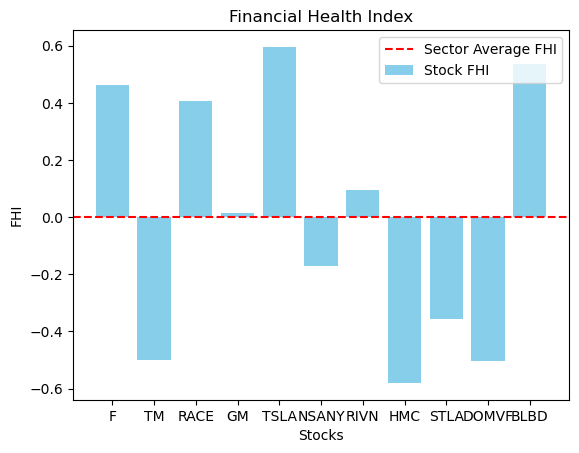

In [15]:
sector_avg_fhi = financial_df['FHI'].mean()

plt.axhline(y=sector_avg_fhi, color='r', linestyle='--', label='Sector Average FHI')
plt.bar(financial_df['ticker'], financial_df['FHI'], color='skyblue', label='Stock FHI')
plt.title('Financial Health Index')
plt.xlabel('Stocks')
plt.ylabel('FHI')
plt.legend()
plt.show()

In [16]:
financial_df['Performance']= financial_df["FHI"].apply(lambda x: "Overperforming" if x > sector_avg_fhi else "Underperforming")
print(financial_df[['ticker', 'FHI', 'Performance']])

   ticker       FHI      Performance
0       F  0.463021   Overperforming
1      TM -0.500178  Underperforming
2    RACE  0.405767   Overperforming
3      GM  0.015893   Overperforming
4    TSLA  0.595734   Overperforming
5   NSANY -0.170356  Underperforming
6    RIVN  0.093733   Overperforming
7     HMC -0.580168  Underperforming
8    STLA -0.355734  Underperforming
9   DOMVF -0.503003  Underperforming
10   BLBD  0.535291   Overperforming


In [17]:
financial_df

,ticker,currentRatio,debtToEquity,returnOnEquity,priceToBook,earningsGrowth,dividendYield,beta,revenue,FHI,Performance
0,F,-0.546814,2.648207,-0.227577,-0.494959,-0.288532,0.062782,0.606795,-0.489123,0.463021,Overperforming
1,TM,-0.474195,-0.046202,-0.129931,-0.598391,-0.626958,-0.306987,-1.447998,2.643196,-0.500178,Underperforming
2,RACE,-0.200547,-0.161750,0.586547,2.228552,0.202848,-0.627816,-0.467302,-0.501071,0.405767,Overperforming
3,GM,-0.491907,0.702112,-0.096570,-0.510151,0.293175,-0.582955,0.236532,-0.489124,0.015893,Overperforming
4,TSLA,0.070445,-0.946189,0.035392,1.555442,0.235365,-0.706664,1.705909,-0.494924,0.595734,Overperforming
5,NSANY,0.025280,0.136150,-0.339433,-0.605932,1.019921,-0.002472,-0.565705,0.352959,-0.170356,Underperforming
6,RIVN,2.944197,-0.057493,-1.821362,-0.320237,-0.871599,-0.706664,1.288946,-0.501201,0.093733,Overperforming
7,HMC,-0.295305,-0.265185,-0.220430,-0.605137,-0.682359,0.032874,-1.304563,0.963681,-0.580168,Underperforming
8,STLA,-0.549471,-0.723857,-0.041639,-0.547520,-0.517361,0.939623,-0.057010,-0.489567,-0.355734,Underperforming
9,DOMVF,-0.154496,-0.895582,-0.205032,-0.603102,-1.120747,2.604943,-0.574044,-0.493405,-0.503003,Underperforming


In [18]:
new_df= financial_df[['ticker', 'revenue','beta','FHI','Performance']]
new_df

,ticker,revenue,beta,FHI,Performance
0,F,-0.489123,0.606795,0.463021,Overperforming
1,TM,2.643196,-1.447998,-0.500178,Underperforming
2,RACE,-0.501071,-0.467302,0.405767,Overperforming
3,GM,-0.489124,0.236532,0.015893,Overperforming
4,TSLA,-0.494924,1.705909,0.595734,Overperforming
5,NSANY,0.352959,-0.565705,-0.170356,Underperforming
6,RIVN,-0.501201,1.288946,0.093733,Overperforming
7,HMC,0.963681,-1.304563,-0.580168,Underperforming
8,STLA,-0.489567,-0.057010,-0.355734,Underperforming
9,DOMVF,-0.493405,-0.574044,-0.503003,Underperforming


To understand the valuation of stocks, that is whether the stocks are under valued, over valued or fairly valued, I decided to first standardise the fhi scores too for simplicity of comparison and a wider range of values. 
I have made use of outliers and set some thresholds, the points beyond these thresholds will be detected as outliers and defined as either undervalued or overvalued. 
The points within the threshold will be defined as fairly valued.

In [19]:
financial_df['FHI_zscore'] = (financial_df['FHI'] - financial_df['FHI'].mean()) / financial_df['FHI'].std()
#detect the outliers

def detect_outliers(FHI_zscore, financial_df):
    if FHI_zscore > 1.00:
        return 'Overvalued'
    elif 0.00> FHI_zscore >= -1.00:
      return 'Undervalued'
    else:
      return 'Fairly Valued'

financial_df['Valuation']= financial_df['FHI_zscore'].apply(lambda x: detect_outliers(x, financial_df))
financial_df

,ticker,currentRatio,debtToEquity,returnOnEquity,priceToBook,earningsGrowth,dividendYield,beta,revenue,FHI,Performance,FHI_zscore,Valuation
0,F,-0.546814,2.648207,-0.227577,-0.494959,-0.288532,0.062782,0.606795,-0.489123,0.463021,Overperforming,1.028971,Overvalued
1,TM,-0.474195,-0.046202,-0.129931,-0.598391,-0.626958,-0.306987,-1.447998,2.643196,-0.500178,Underperforming,-1.111544,Fairly Valued
2,RACE,-0.200547,-0.161750,0.586547,2.228552,0.202848,-0.627816,-0.467302,-0.501071,0.405767,Overperforming,0.901735,Fairly Valued
3,GM,-0.491907,0.702112,-0.096570,-0.510151,0.293175,-0.582955,0.236532,-0.489124,0.015893,Overperforming,0.035319,Fairly Valued
4,TSLA,0.070445,-0.946189,0.035392,1.555442,0.235365,-0.706664,1.705909,-0.494924,0.595734,Overperforming,1.323898,Overvalued
5,NSANY,0.025280,0.136150,-0.339433,-0.605932,1.019921,-0.002472,-0.565705,0.352959,-0.170356,Underperforming,-0.378583,Undervalued
6,RIVN,2.944197,-0.057493,-1.821362,-0.320237,-0.871599,-0.706664,1.288946,-0.501201,0.093733,Overperforming,0.208303,Fairly Valued
7,HMC,-0.295305,-0.265185,-0.220430,-0.605137,-0.682359,0.032874,-1.304563,0.963681,-0.580168,Underperforming,-1.289306,Fairly Valued
8,STLA,-0.549471,-0.723857,-0.041639,-0.547520,-0.517361,0.939623,-0.057010,-0.489567,-0.355734,Underperforming,-0.790547,Undervalued
9,DOMVF,-0.154496,-0.895582,-0.205032,-0.603102,-1.120747,2.604943,-0.574044,-0.493405,-0.503003,Underperforming,-1.117823,Fairly Valued


In [20]:
new_df= financial_df[['ticker', 'revenue','beta','FHI_zscore','Performance','Valuation']]
new_df

,ticker,revenue,beta,FHI_zscore,Performance,Valuation
0,F,-0.489123,0.606795,1.028971,Overperforming,Overvalued
1,TM,2.643196,-1.447998,-1.111544,Underperforming,Fairly Valued
2,RACE,-0.501071,-0.467302,0.901735,Overperforming,Fairly Valued
3,GM,-0.489124,0.236532,0.035319,Overperforming,Fairly Valued
4,TSLA,-0.494924,1.705909,1.323898,Overperforming,Overvalued
5,NSANY,0.352959,-0.565705,-0.378583,Underperforming,Undervalued
6,RIVN,-0.501201,1.288946,0.208303,Overperforming,Fairly Valued
7,HMC,0.963681,-1.304563,-1.289306,Underperforming,Fairly Valued
8,STLA,-0.489567,-0.057010,-0.790547,Underperforming,Undervalued
9,DOMVF,-0.493405,-0.574044,-1.117823,Underperforming,Fairly Valued


For further evaluation, the FHI scores are categorised as "High", "Low" and "Moderate", again with the help of set thresholds. 

In [21]:
def categorize_fhi(fhi_zscore):
    if fhi_zscore < -1.00:
        return 'Low'
    elif -1.00 <= fhi_zscore <= 1.00:
        return 'Moderate'
    else:
        return 'High'

new_df['FHI_Category'] = new_df['FHI_zscore'].apply(categorize_fhi)
new_df

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_4372\500473507.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['FHI_Category'] = new_df['FHI_zscore'].apply(categorize_fhi)


,ticker,revenue,beta,FHI_zscore,Performance,Valuation,FHI_Category
0,F,-0.489123,0.606795,1.028971,Overperforming,Overvalued,High
1,TM,2.643196,-1.447998,-1.111544,Underperforming,Fairly Valued,Low
2,RACE,-0.501071,-0.467302,0.901735,Overperforming,Fairly Valued,Moderate
3,GM,-0.489124,0.236532,0.035319,Overperforming,Fairly Valued,Moderate
4,TSLA,-0.494924,1.705909,1.323898,Overperforming,Overvalued,High
5,NSANY,0.352959,-0.565705,-0.378583,Underperforming,Undervalued,Moderate
6,RIVN,-0.501201,1.288946,0.208303,Overperforming,Fairly Valued,Moderate
7,HMC,0.963681,-1.304563,-1.289306,Underperforming,Fairly Valued,Low
8,STLA,-0.489567,-0.057010,-0.790547,Underperforming,Undervalued,Moderate
9,DOMVF,-0.493405,-0.574044,-1.117823,Underperforming,Fairly Valued,Low


Finally the recommendations are made using the make_recommendations function. It takes the new_df dataframe, that stores only the data necessary for the recommendation, and user_choice as input. 

An empty list called recommendations is initiated, and the new_df is looped through while making these recommendations. While writing the if statements, there might be an inconsistency as they are all conditioned based upon factors that are truly important for particular cases of goals. 

Based on the conditions and user choice, the stocks are labelled and recommended to "avoid", "buy" or "keep an eye" on.

In [22]:
def make_recommendations(new_df, user_choice):
    # Add FHI category to dataframe
    new_df['FHI_Category'] = new_df['FHI_zscore'].apply(categorize_fhi)

    recommendations = []

    for _, row in new_df.iterrows():
        fhi_category = row['FHI_Category']
        performance = row['Performance']
        valuation = row['Valuation']
        beta = row['beta']
        revenue = row['revenue']

        if user_choice == 'stability':
            if performance == 'Overperforming' and beta < 1.0 and valuation=='Fairly Valued':
                recommendations.append('Buy')
            elif fhi_category == 'Moderate' and valuation == 'Fairly Valued':
                recommendations.append('Keep an Eye')
            elif performance == 'Underperforming' or valuation == 'Overvalued':
                recommendations.append('Avoid')
            else:
                recommendations.append('Keep an Eye')

        elif user_choice == 'growth':  # Growth
            if fhi_category  == 'High' or 'Moderate' and performance == 'Overperforming' :
                recommendations.append('Buy')
            elif fhi_category  == 'High' or 'Moderate' and performance== 'Overperforming' :
                recommendations.append('Keep an Eye')
            elif performance == 'Underperforming' and valuation == 'Fairly Valued':
                recommendations.append('Avoid')
            else:
                recommendations.append('Keep an Eye')


        elif user_choice == 'Value':  # Value
            if fhi_category == 'High' or 'Moderate' and performance== 'overperforming' and valuation == 'Fairly Valued':
                recommendations.append('Buy')
            elif fhi_category == 'Moderate' and valuation == 'Undervalued':
                recommendations.append('Keep an Eye')
            elif performance == 'Underperforming' and valuation == 'Fairly Valued' or 'Overvalued':
                recommendations.append('Avoid')
            else:
                recommendations.append('Keep an Eye')


        else:
            recommendations.append('Invalid Choice')

    # Add recommendations to the dataframe
    new_df['Recommendation'] = recommendations
    return new_df


In [23]:
new_df = make_recommendations(new_df, user_choice)
print(new_df[['ticker', 'Recommendation']])

   ticker Recommendation
0       F            Buy
1      TM          Avoid
2    RACE          Avoid
3      GM          Avoid
4    TSLA            Buy
5   NSANY    Keep an Eye
6    RIVN          Avoid
7     HMC          Avoid
8    STLA    Keep an Eye
9   DOMVF          Avoid
10   BLBD            Buy


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_4372\3383050061.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['FHI_Category'] = new_df['FHI_zscore'].apply(categorize_fhi)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_4372\3383050061.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Recommendation'] = recommendations


In [24]:
new_df

,ticker,revenue,beta,FHI_zscore,Performance,Valuation,FHI_Category,Recommendation
0,F,-0.489123,0.606795,1.028971,Overperforming,Overvalued,High,Buy
1,TM,2.643196,-1.447998,-1.111544,Underperforming,Fairly Valued,Low,Avoid
2,RACE,-0.501071,-0.467302,0.901735,Overperforming,Fairly Valued,Moderate,Avoid
3,GM,-0.489124,0.236532,0.035319,Overperforming,Fairly Valued,Moderate,Avoid
4,TSLA,-0.494924,1.705909,1.323898,Overperforming,Overvalued,High,Buy
5,NSANY,0.352959,-0.565705,-0.378583,Underperforming,Undervalued,Moderate,Keep an Eye
6,RIVN,-0.501201,1.288946,0.208303,Overperforming,Fairly Valued,Moderate,Avoid
7,HMC,0.963681,-1.304563,-1.289306,Underperforming,Fairly Valued,Low,Avoid
8,STLA,-0.489567,-0.057010,-0.790547,Underperforming,Undervalued,Moderate,Keep an Eye
9,DOMVF,-0.493405,-0.574044,-1.117823,Underperforming,Fairly Valued,Low,Avoid


## Tests

I have decided to test whether certain stocks that are performing lowly or aren't upto the mark in real time are avoided. This was also tested with other low performing stocks like Suzuki and Li Auto that are still being avoided to ensure a robust model. 

I have also tested whether the calculated FHI is accurate, this in turn will can also provide an assurance that the correct weights are being fetched after the user makes their choice, to calculate the FHI.

In [25]:
def test_always_avoid_stocks():
    avoid_stocks = ['RIVN', 'DOMFV']

    for user_choice in ['stability', 'growth', 'value']:
        result_df = make_recommendations(new_df, user_choice)

        for ticker in avoid_stocks:
            recommendation = result_df.loc[result_df['ticker'] == ticker, 'Recommendation'].values[0]
            assert recommendation == 'Avoid', f"{ticker} was not avoided for {user_choice}."


In [26]:
def test_fhi_calculation(financial_df, user_choice, for_ford, for_tesla, for_race):

    if user_choice == 'stability':
        ford_fhi = financial_df[financial_df['ticker'] == 'F']['FHI'].item()
        assert round(ford_fhi, 2) == round(for_ford, 2), f"Ford's FHI doesn't match: {ford_fhi}"

    elif user_choice == 'growth':
        tesla_fhi = financial_df[financial_df['ticker'] == 'TSLA']['FHI'].item()
        assert round(tesla_fhi, 2) == round(for_tesla, 2), f"Tesla's FHI doesn't match: {tesla_fhi}"
        
    elif user_choice == 'Value':
        race_fhi = financial_df[financial_df['ticker'] == 'RACE']['FHI'].item()
        assert round(race_fhi, 2) == round(for_race, 2), f"Ferarri's FHI doesn't match: {race_fhi}"

    else:
        raise ValueError("Invalid user choice, only 'stability' or 'growth' are allowed.")


for_ford = 0.453442
for_tesla = 0.017818
for_race= 0.405718	
test_fhi_calculation(financial_df, user_choice, for_ford, for_tesla, for_race)



### How you would improve / develop the code if given more time

If I were given more time, I would like to develop a dashboard that would consist of 3 major tabs: User portfolio that will consist of analysis of all the stocks that user already has, recommended stocks and stocks to enhance/ balance the user's portfolio, and the last tab would provide real time news and data on stocks using market sentiment factors with the Twitter API. There would also be a search option for user to look through the stocks they might be interested in and check whether they are worth buying based on the personalised user recommendation. 

There could also be a more thorough data analysis with an access to any bloomberg terminal to fetch the past data, like more specific metrics that were a part of this project. 

There could be predictive analysis using prediction interval method or time series model like prophet by facebook. Prophet because it's the model that works best with non stationery and fluctuating data, unlike ARIMA which is popular but not suitable for data of this kind.

## Conclusion

The stock analysis project focused on creating a simple yet effective way to evaluate the financial health of companies using Financial Health Index (FHI). By combining multiple financial metrics and allowing users to prioritise stability, growth, or value, the tool aimed to provide clear and personalised investment insights. 

Through features like valuation and stock performance, the project helped in simplifying the the process to identify stocks worth buying, avoiding, or monitoring. Overall, it streamlined decision making for investors, making financial analysis more approachable.